# **Project Title : EDA On HR Analytics**

**Name: Vikash Kumar Diwakar**

# **Problem Statement**
**HR Analytics Project** - Understanding the Attrition in HR
Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and
money in training those employees, not just this but there are training programs within the
companies for their existing employees as well. The aim of these programs is to increase the
effectiveness of their employees. But where HR Analytics fit in this? and is it just about
improving the performance of employees?

**HR Analytics**

Human resource analytics (HR analytics) is an area in the field of analytics that refers to
applying analytic processes to the human resource department of an organization in the hope of
improving employee performance and therefore getting a better return on investment. HR
analytics does not just deal with gathering data on employee efficiency. Instead, it aims to
provide insight into each process by gathering data and then using it to make relevant
decisions about how to improve these processes.

**Attrition in HR**

Attrition in human resources refers to the gradual loss of employees overtime. In general,
relatively high attrition is problematic for companies. HR professionals often assume a
leadership role in designing company compensation programs, work culture, and motivation
systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition?
We will discuss the first question here and for the second question, we will write the code and try
to understand the process step by step.

**Attrition affecting Companies**

A major problem in high employee attrition is its cost to an organization. Job postings, hiring
processes, paperwork, and new hire training are some of the common expenses of losing
employees and replacing them. Additionally, regular employee turnover prohibits your
organization from increasing its collective knowledge base and experience over time. This is
especially concerning if your business is customer-facing, as customers often prefer to interact
with familiar people. Errors and issues are more likely if you constantly have new workers.


In [3]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
# defining path and reading the file
path='/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df=pd.read_csv(path)

# **Exploring DataFrame**

In [5]:
# having a look of top 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


* there are many columns in this dataset.

In [6]:
# lets check no of rows and columns
df.shape
print('The number of rows :', df.shape[0])
print('The number of columns :', df.shape[1])

The number of rows : 1470
The number of columns : 35


In [7]:
# viewing all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# describing numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
# checking how many numerical columns are there
print('Total number of numerical columns are :' ,len(df.describe().T))

Total number of numerical columns are : 26


* we will in future process sepaetare some numerical columns into catagorical columns

# **Cleaning The Data**

In [10]:
# checking null values and unique value counts
# This user define function will give the type,count of null and non null values as well as null ratio
def playstoreinfo():
  '''function gives the whole info of data
  '''
  temp=pd.DataFrame(index=df.columns)
  temp["datatype"]=df.dtypes
  temp["not null values"]=df.count()
  temp["null value"]=df.isnull().sum()
  temp["% of the null value"]=df.isnull().mean()
  temp["unique count"]=df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
Age,int64,1470,0,0.0,43
Attrition,object,1470,0,0.0,2
BusinessTravel,object,1470,0,0.0,3
DailyRate,int64,1470,0,0.0,886
Department,object,1470,0,0.0,3
DistanceFromHome,int64,1470,0,0.0,29
Education,int64,1470,0,0.0,5
EducationField,object,1470,0,0.0,6
EmployeeCount,int64,1470,0,0.0,1
EmployeeNumber,int64,1470,0,0.0,1470


**Findings:**


*   clearly see there are no null values.
*   many columns like `Attrition`,`BusinessTravel`  etc are catagorical columns.
* we will verify data types of each columns further if necessary will convert the datatype.
* drop some unneccessary features.

# **`BusinessTravel`:**

In [11]:
# replacing '_' with  ' '
df['BusinessTravel']=df['BusinessTravel'].str.replace('_' ,' ')

In [12]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel Rarely        1043
Travel Frequently     277
Non-Travel            150
Name: count, dtype: int64

# seperating continious and catagorical features

In [13]:
continious_var=['Age','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','MonthlyIncome']

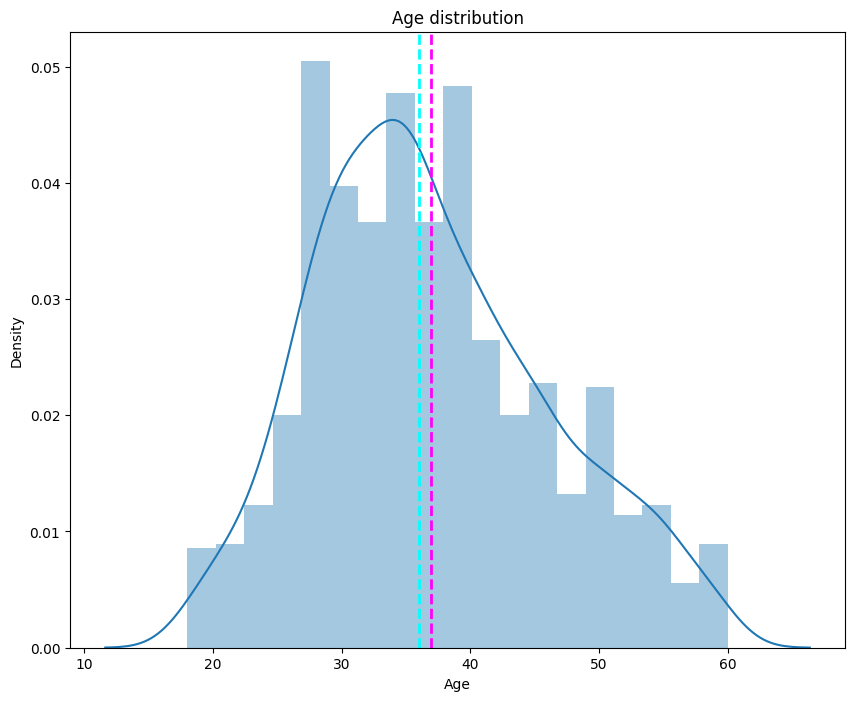

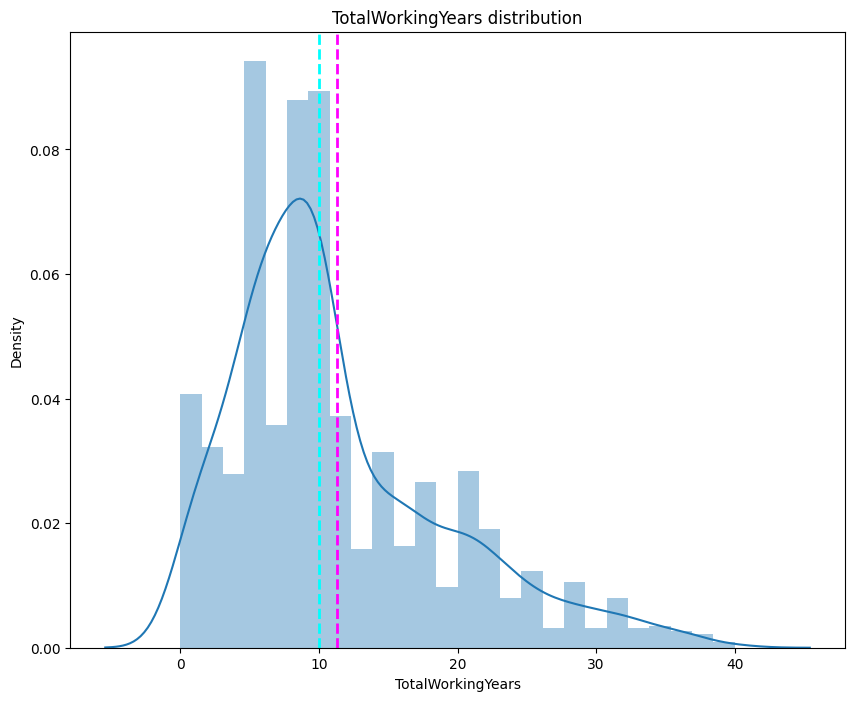

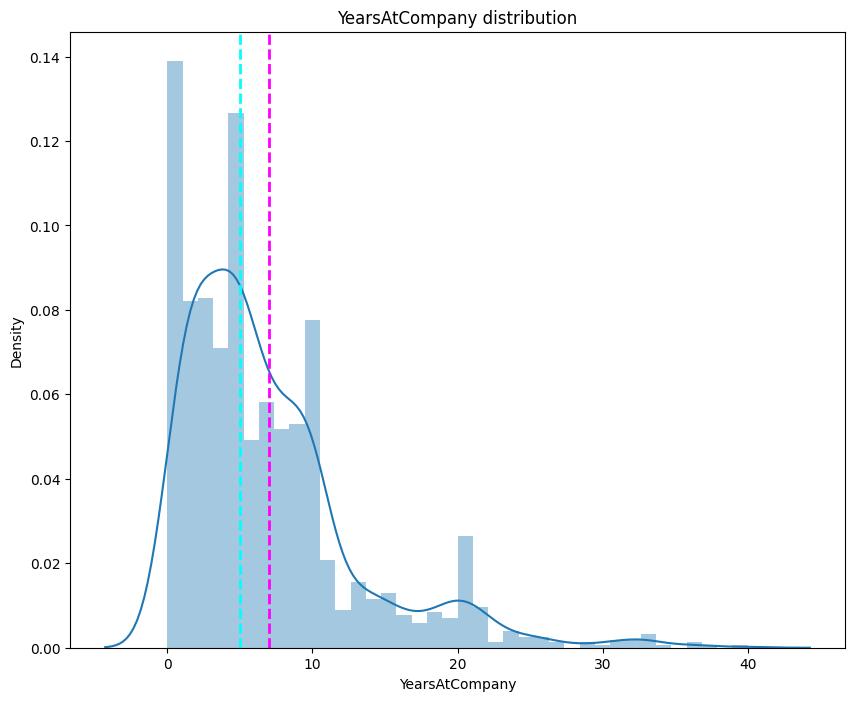

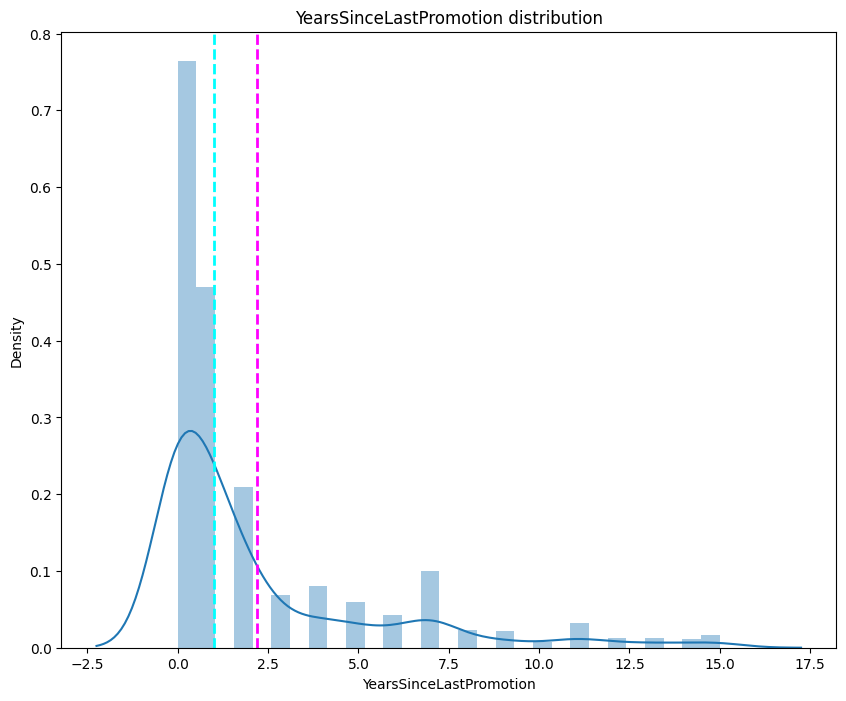

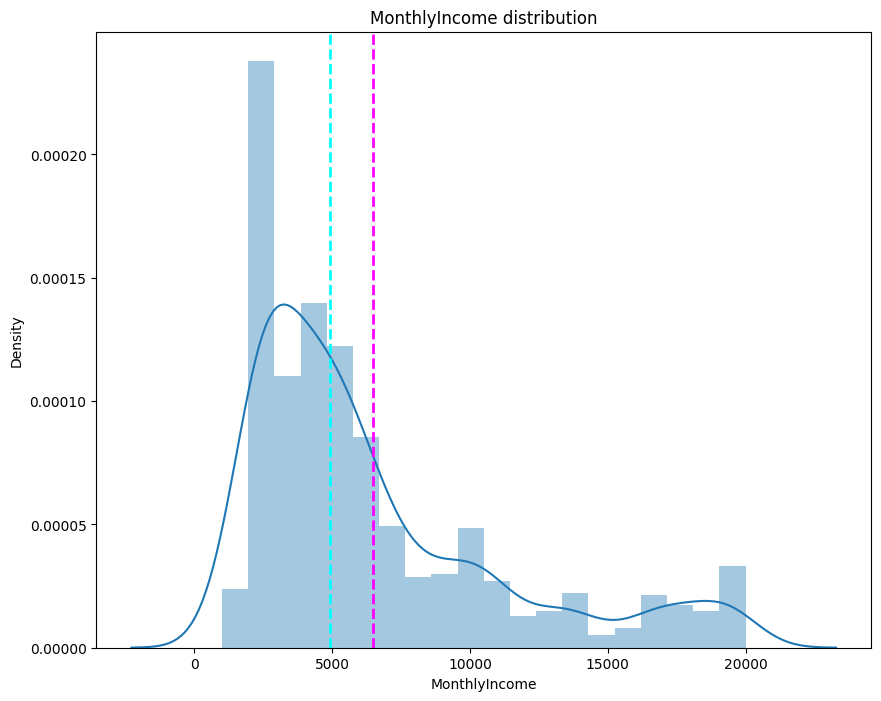

In [14]:
for col in continious_var:
  plt.figure(figsize=(10,8))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(),color='magenta',linestyle='dashed',linewidth=2)
  plt.axvline(df[col].median(),color='cyan',linestyle='dashed',linewidth=2)
  plt.title(col+ ' distribution')

**Finding:**

* **except `Age` column all the other contionious columns are right sqewed.**

* **in `MonthlyIncome ` the mean and median salary are very different.**

<Axes: xlabel='Age', ylabel='count'>

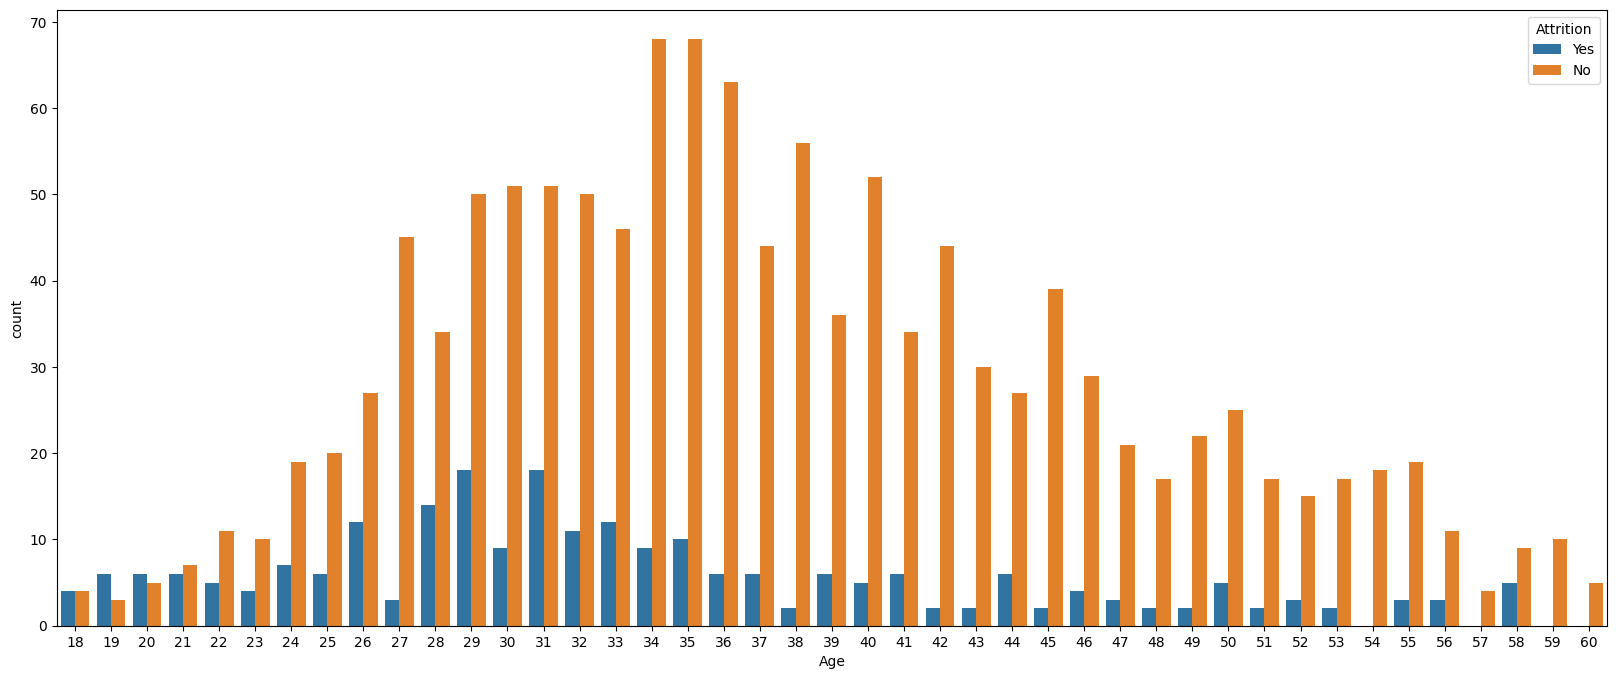

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(x='Age',hue='Attrition',data=df)

**Observation:**


*   **employees of Age of 19 and 20 shows attrition rate higher means company loses freshers often.**
* **as the age increases the rate of attrition decreases drastically.**



<Axes: xlabel='TotalWorkingYears', ylabel='count'>

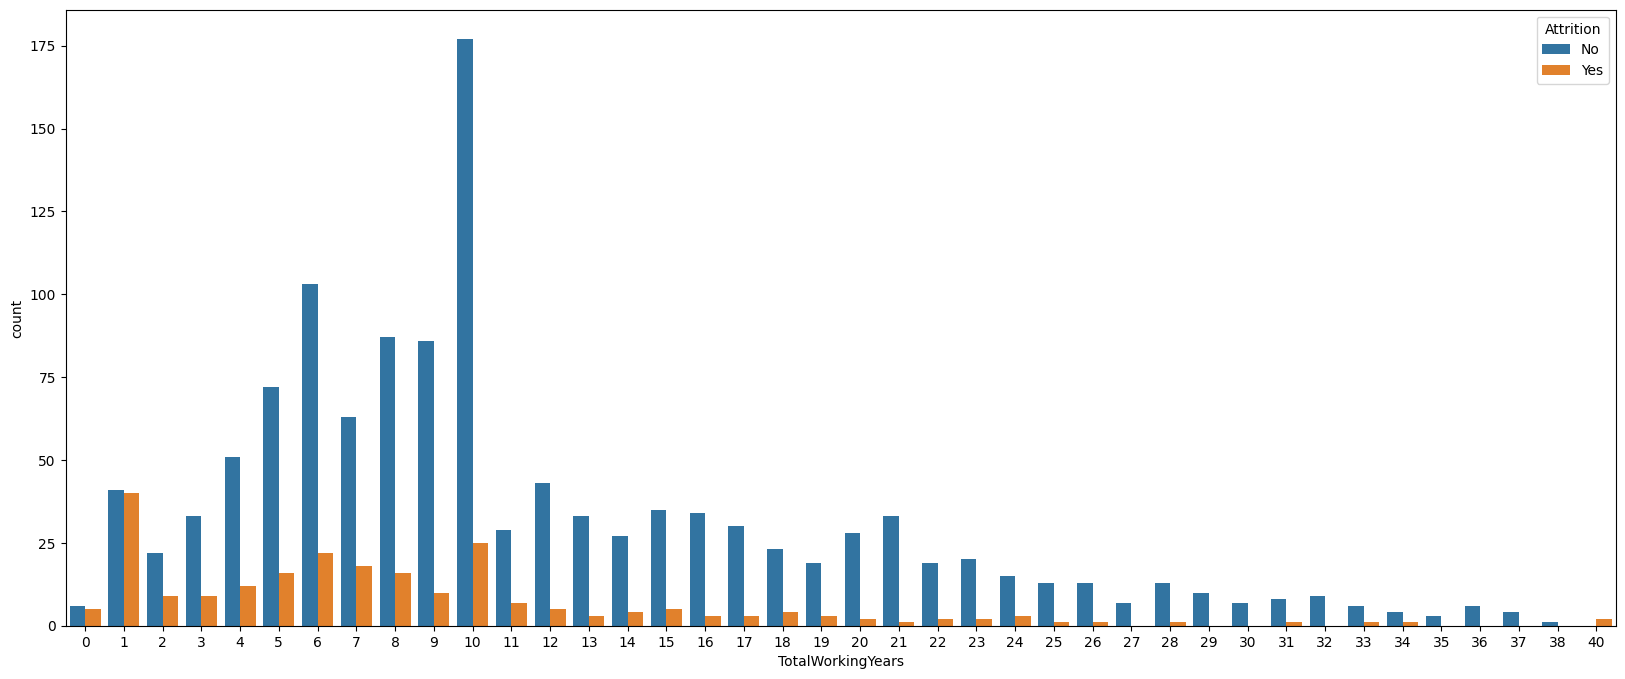

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=df)

**Again proved freshers having experience of upto 1 year attirate easily**

In [17]:
# catagorical features
catagorical_var=['Attrition','BusinessTravel','Department','Gender','JobRole','NumCompaniesWorked','OverTime','PerformanceRating']

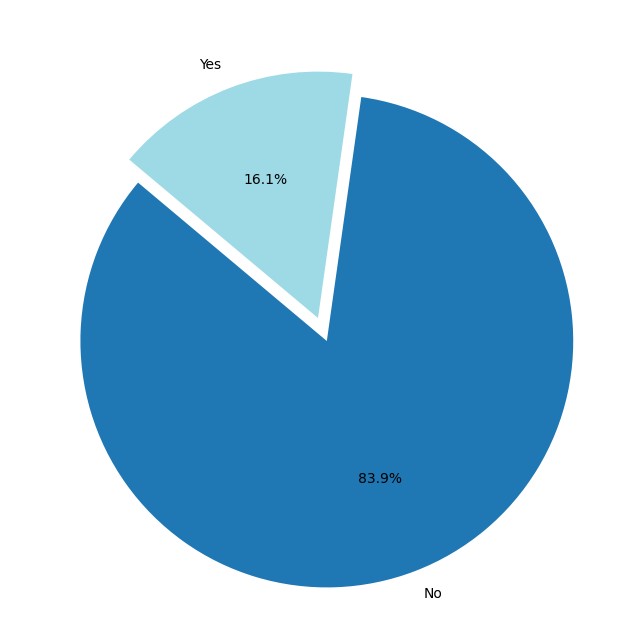

In [18]:
attrition_counts = df['Attrition'].value_counts()
explode = [0.1] + [0] * (len(attrition_counts) - 1)
colors = plt.cm.tab20(np.linspace(0, 1, len(attrition_counts)))
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', explode=explode, colors=colors,startangle=140);

**The overall percentage of Attrition is 16.1%**

<Axes: xlabel='BusinessTravel', ylabel='count'>

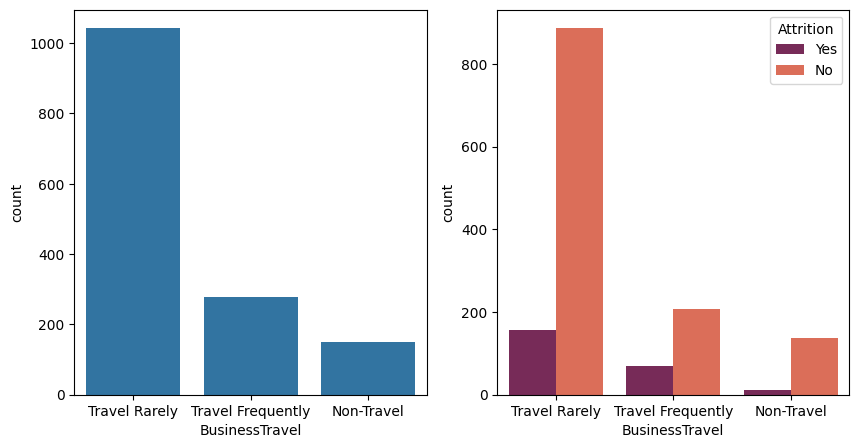

In [19]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'BusinessTravel', ax = axes[0], data = df)
sns.countplot(x = 'BusinessTravel', hue = 'Attrition',ax = axes[1], data = df,palette='rocket')

<Axes: xlabel='Department', ylabel='count'>

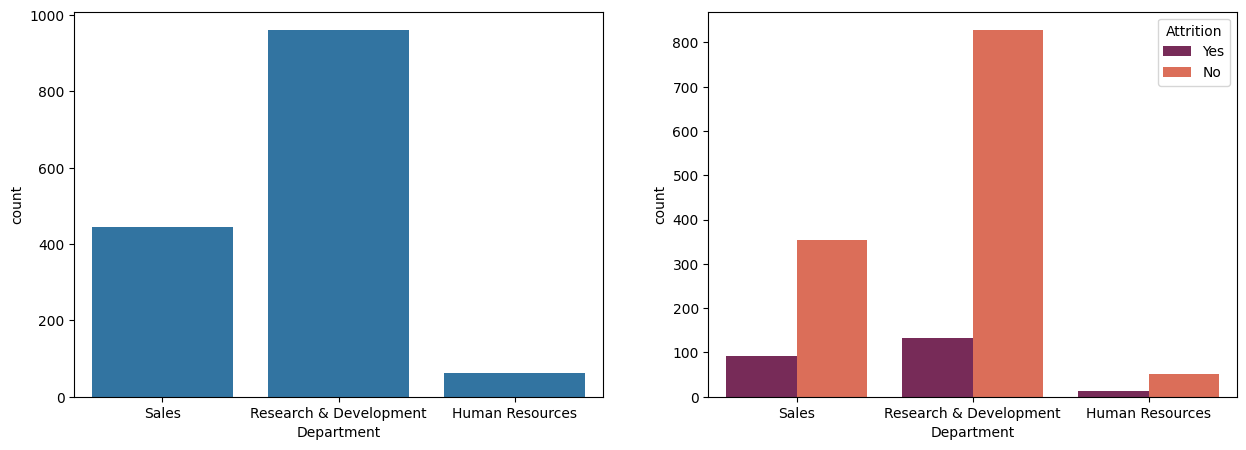

In [20]:
fig, axes = plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(x = 'Department', ax = axes[0], data = df)
sns.countplot(x = 'Department', hue = 'Attrition',ax = axes[1], data = df,palette='rocket')

<Axes: xlabel='Gender', ylabel='count'>

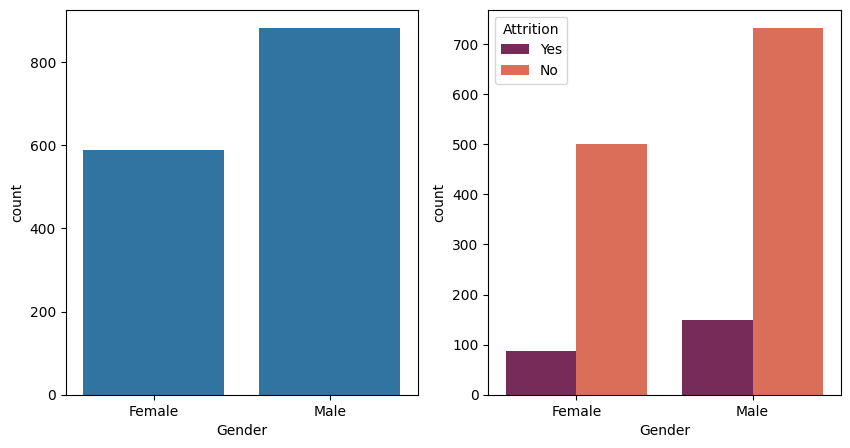

In [21]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'Gender', ax = axes[0], data = df)
sns.countplot(x = 'Gender', hue = 'Attrition',ax = axes[1], data = df,palette='rocket')

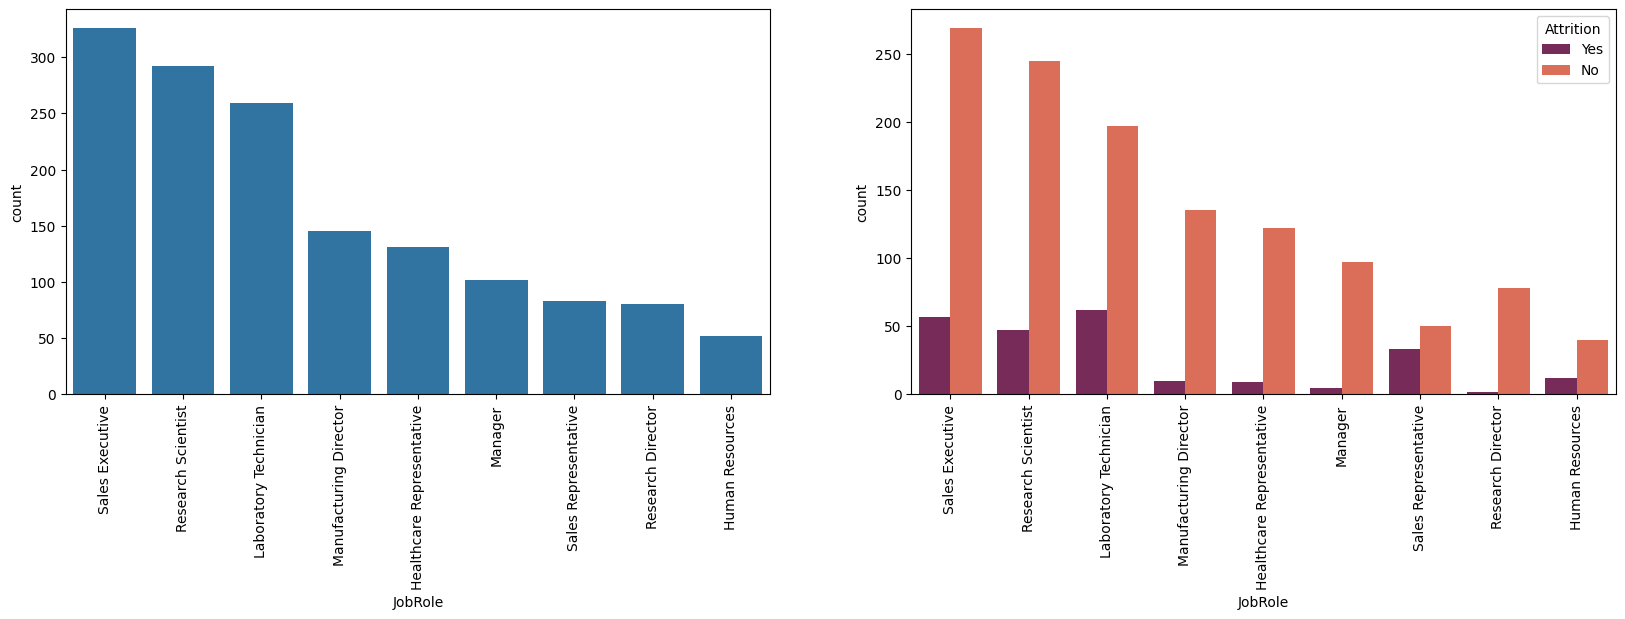

In [22]:
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x = 'JobRole', ax = axes[0], data = df)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
sns.countplot(x = 'JobRole', hue = 'Attrition',ax = axes[1], data = df,palette='rocket')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90);

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

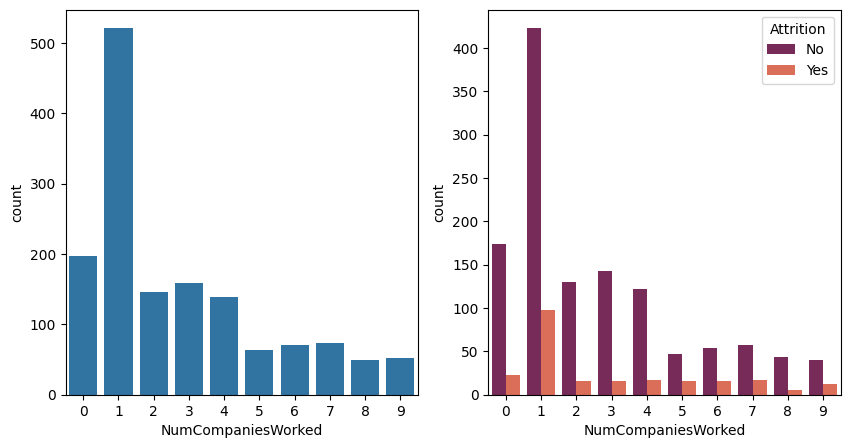

In [23]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'NumCompaniesWorked', ax = axes[0], data = df)
sns.countplot(x = 'NumCompaniesWorked', hue = 'Attrition',ax = axes[1], data = df,palette='rocket')

<Axes: xlabel='PerformanceRating', ylabel='count'>

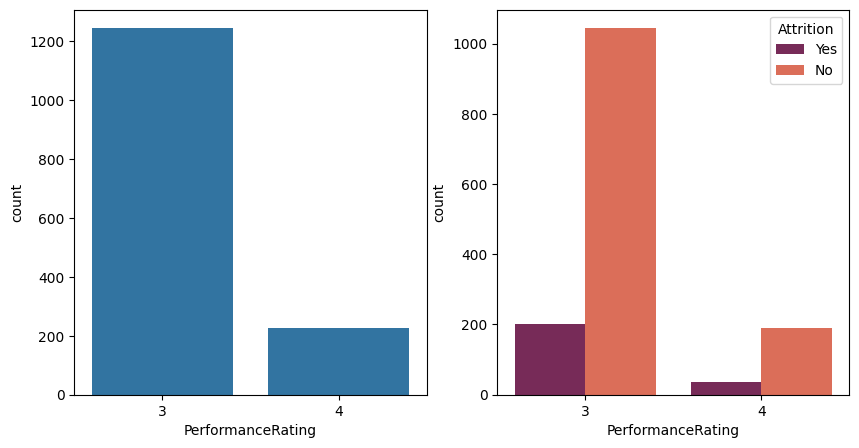

In [24]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'PerformanceRating', ax = axes[0], data = df)
sns.countplot(x = 'PerformanceRating', hue = 'Attrition',ax = axes[1], data = df,palette='rocket')

# **Correlation Analysis**

<Axes: title={'center': 'Correlation Analysis'}>

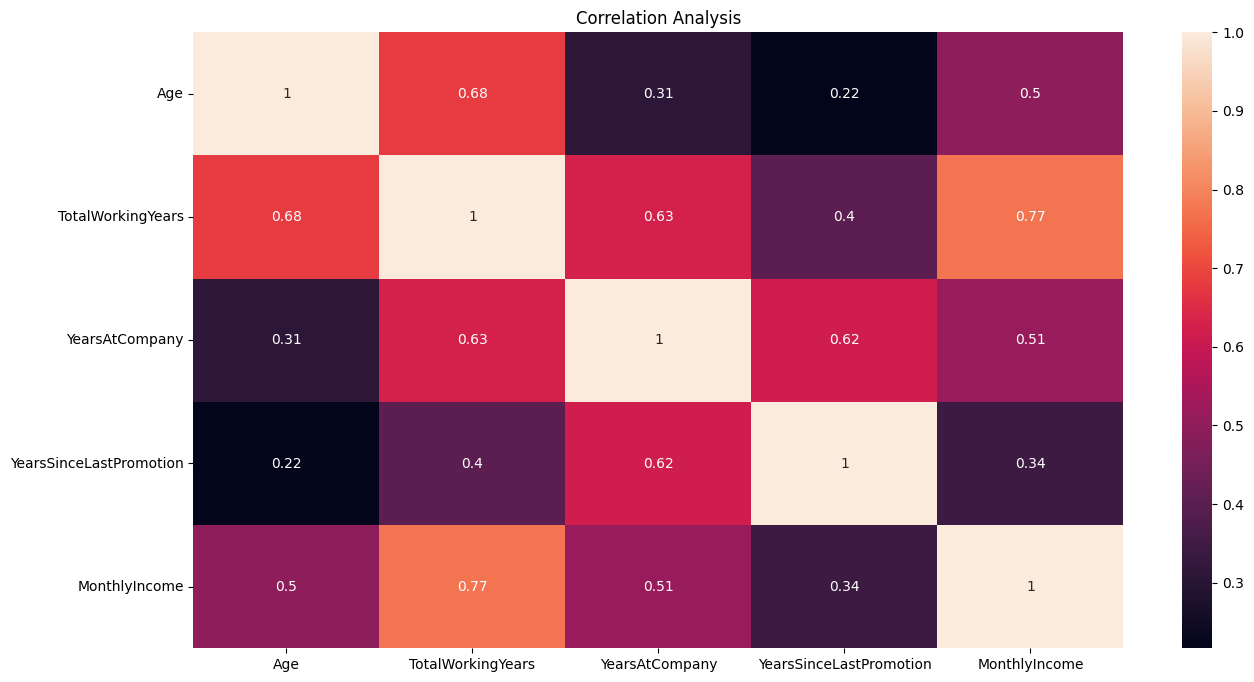

In [25]:
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation=df[continious_var].corr()
sns.heatmap(abs(correlation),annot=True)

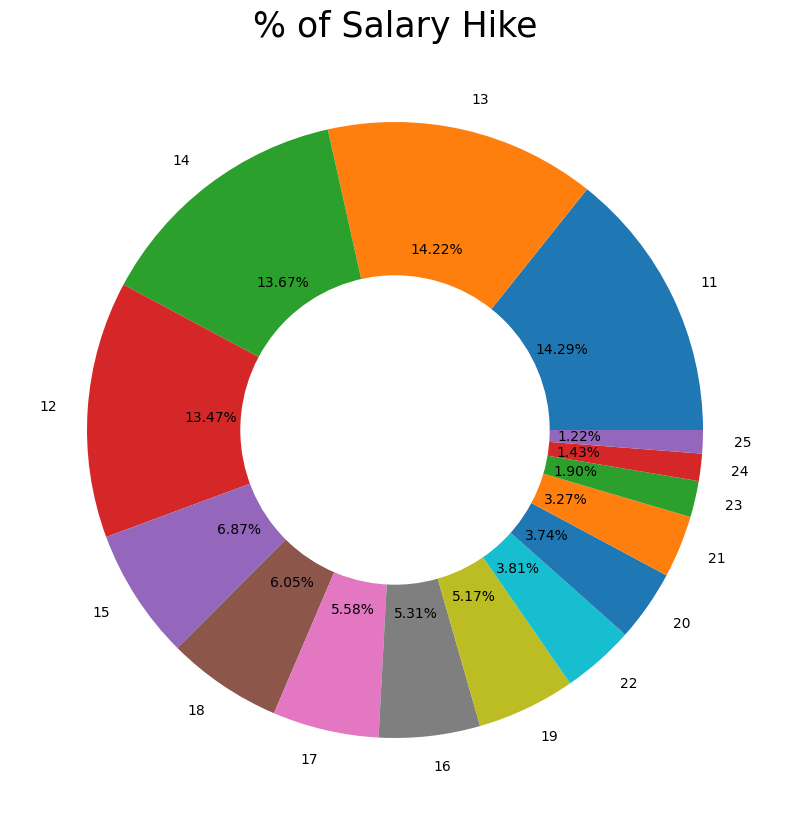

In [26]:
plt.figure(figsize=(10,10))
plt.pie(df.PercentSalaryHike.value_counts(), labels=df.PercentSalaryHike.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of Salary Hike', fontsize = 25)
plt.show()

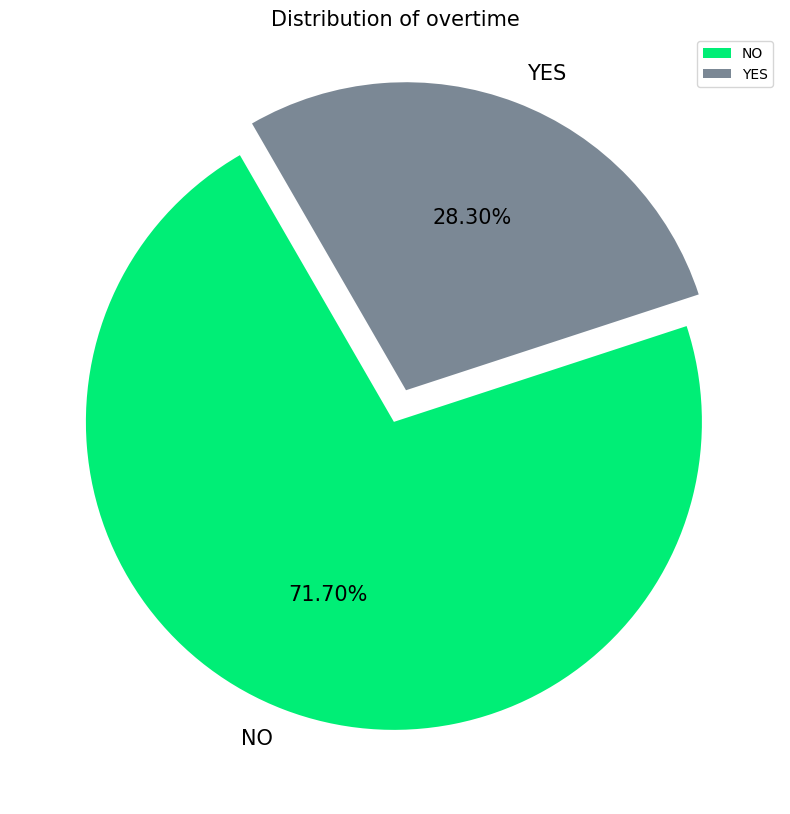

In [27]:
data = df['OverTime'].value_counts()
labels = ['NO', 'YES']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15},startangle=120)
plt.title('Distribution of overtime',size=15,loc='center')
plt.legend()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Text(0.5, 1.0, 'Monthly Income For Each Job Role')

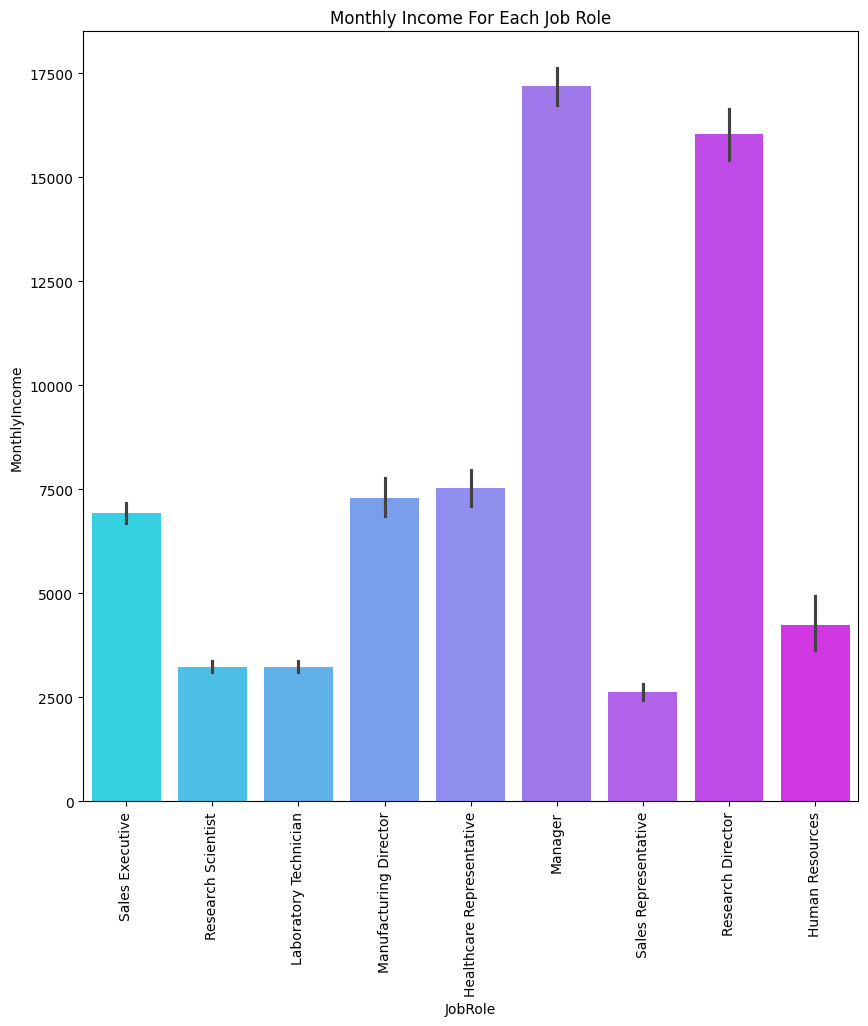

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x='JobRole',y='MonthlyIncome',data=df,palette='cool')
plt.xticks(rotation=90)
plt.title('Monthly Income For Each Job Role')

Text(0.5, 1.0, 'Monthly Income For Each Department')

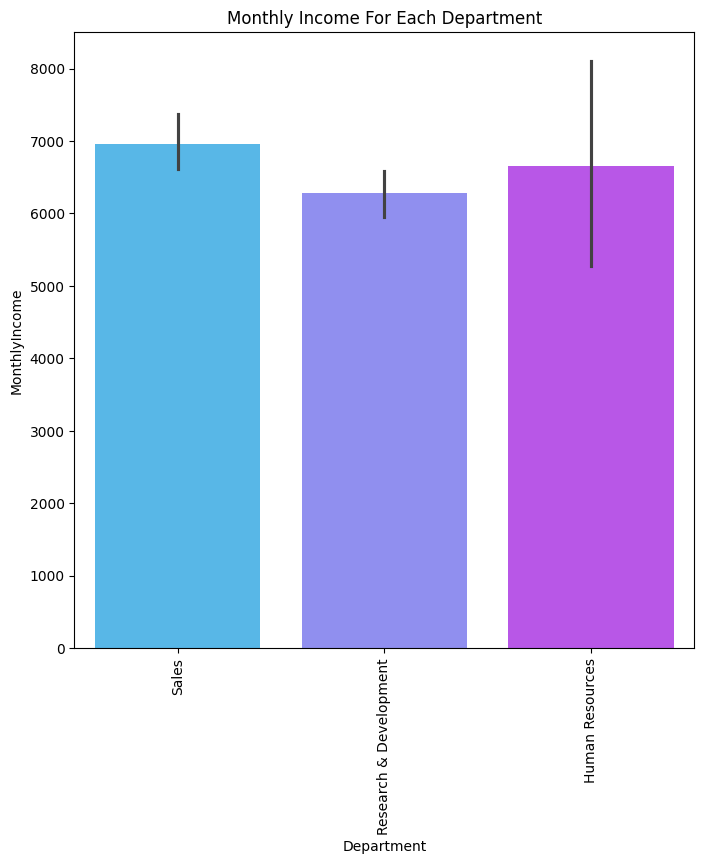

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(x='Department',y='MonthlyIncome',data=df,palette='cool')
plt.xticks(rotation=90)
plt.title('Monthly Income For Each Department')

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(y='YearsAtCompany',x='MonthlyIncome',data=df,palette='cool',orient='h')
plt.xticks(rotation=90)
plt.title('Monthly Income For YearsAtCompany')